#Student Name: ChengYang, Tsai
#ECE 595 Introduction to Deep Learning
#Project 1: CLDNN - Student Code

In [1]:
!python --version

Python 3.7.12


In [12]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Sep 19 14:27:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    29W /  70W |   4088MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import pickle as cPickle

#Part 0: Importing and normalizing data

In [4]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 0s 0us/step


#Part 1: Plotting cross entropy

Text(0.5, 1.0, 'the plot of the negative log-likelihood')

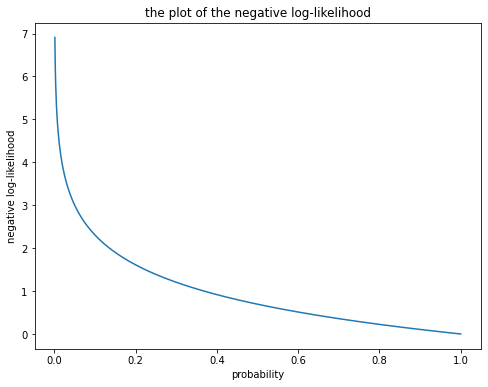

In [5]:
#Show cross-entropy loss function
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
p = np.linspace(0.001, 1, 1000)
y = -np.log(p)

plt.figure(figsize=(8,6))
plt.plot(p, y)
plt.xlabel("probability")
plt.ylabel("negative log-likelihood")
plt.title("the plot of the negative log-likelihood")

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: When p is small, the negative log-likelihood to p is large, so it is affected by p seriously. When p is large, the negative log-likelihood to p is small relatively.


2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: It is a convex function, so the gradient descent algorithm can always lead to a global minimum. When p reachs its target value 1, the minimal value of negative log-likelihood 0 is also reached.




#Part 2: Overfit CNN

In [6]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='softmax'))
    #FILL THIS IN WITH MODEL ARCHITECTURE

    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#FILL THIS IN


#Train the model and assign training meta-data to a variable
CNN_mdata = CNN_overfit.fit(data_train, labels_train, epochs=150, batch_size=500, validation_data = (data_test, labels_test))
#FILL THIS IN

#Print accuracy of model on testing set after training 
test_loss, test_acc = CNN_overfit.evaluate(data_test, labels_test)
#FILL THIS IN

Epoch 1/150
120/120 [==============================] - 25s 48ms/step - loss: 0.7227 - accuracy: 0.7363 - val_loss: 0.4629 - val_accuracy: 0.8277
Epoch 2/150
120/120 [==============================] - 6s 46ms/step - loss: 0.3909 - accuracy: 0.8593 - val_loss: 0.3819 - val_accuracy: 0.8663
Epoch 3/150
120/120 [==============================] - 6s 46ms/step - loss: 0.3327 - accuracy: 0.8805 - val_loss: 0.3389 - val_accuracy: 0.8811
Epoch 4/150
120/120 [==============================] - 6s 47ms/step - loss: 0.3024 - accuracy: 0.8910 - val_loss: 0.3266 - val_accuracy: 0.8844
Epoch 5/150
120/120 [==============================] - 6s 47ms/step - loss: 0.2755 - accuracy: 0.9000 - val_loss: 0.3221 - val_accuracy: 0.8863
Epoch 6/150
120/120 [==============================] - 6s 47ms/step - loss: 0.2594 - accuracy: 0.9054 - val_loss: 0.2830 - val_accuracy: 0.8993
Epoch 7/150
120/120 [==============================] - 6s 47ms/step - loss: 0.2429 - accuracy: 0.9106 - val_loss: 0.2903 - val_accuracy

In [7]:
def plot_ac_ep(x):
  plt.plot(x.history['accuracy'])
  plt.plot(x.history['val_accuracy'])
  plt.title('Model accuracy vs. Epoch')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()


In [8]:
def plot_loss_ep(y):
  plt.plot(y.history['loss'])
  plt.plot(y.history['val_loss'])
  plt.title('Model loss vs. Epoch')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()


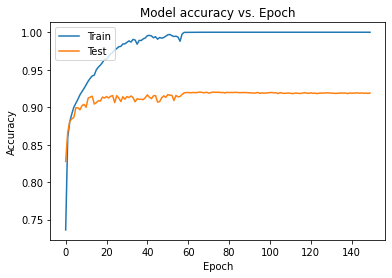

In [9]:
#Plot accuracy vs epoch
plot_ac_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

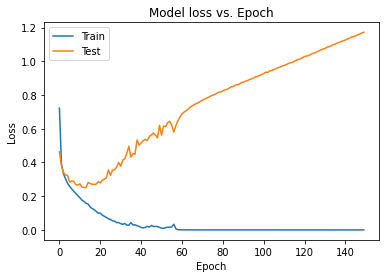

In [10]:
#Plot loss vs epoch
plot_loss_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: Gradually decrease and go to 0

2.   What does the loss of the testing set go to? 

  ANS: Decrease first and then gradually increase
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: Overfitting. The model perfectly fits the training set but losts generalization ability to fit 
other data.

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: Ideally, the training set and testing set will have the same data distribution. However, they are always slightly different from each other for bias or data noise. When the model fits better and better to training set, its complexity and value of parameters grow, the model learned the bias and noise pattern of the training set as a feature. But the testing set have different bias and noise pattern. The model can't fit the testing set anymore. We could use dropout or regularization to avoid this.

#Part 3: Dropout on input layer

In [11]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()
    model.add(Dropout(0.3))
    model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='softmax'))
    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_in.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#FILL THIS IN

#Train the model and assign training meta-data to a variable
CNN_mdata = CNN_dropout_in.fit(data_train, labels_train, epochs=150, batch_size=500, validation_data = (data_test, labels_test))
#FILL THIS IN

#Print accuracy of model on testing set after training 
test_loss, test_acc = CNN_dropout_in.evaluate(data_test, labels_test)
#FILL THIS IN

Epoch 1/150
120/120 [==============================] - 6s 48ms/step - loss: 0.8047 - accuracy: 0.7017 - val_loss: 0.6004 - val_accuracy: 0.7828
Epoch 2/150
120/120 [==============================] - 6s 47ms/step - loss: 0.4881 - accuracy: 0.8189 - val_loss: 0.5266 - val_accuracy: 0.8206
Epoch 3/150
120/120 [==============================] - 6s 47ms/step - loss: 0.4303 - accuracy: 0.8429 - val_loss: 0.4834 - val_accuracy: 0.8358
Epoch 4/150
120/120 [==============================] - 6s 48ms/step - loss: 0.3944 - accuracy: 0.8534 - val_loss: 0.4641 - val_accuracy: 0.8447
Epoch 5/150
120/120 [==============================] - 6s 48ms/step - loss: 0.3708 - accuracy: 0.8618 - val_loss: 0.4223 - val_accuracy: 0.8543
Epoch 6/150
120/120 [==============================] - 6s 48ms/step - loss: 0.3510 - accuracy: 0.8693 - val_loss: 0.3962 - val_accuracy: 0.8645
Epoch 7/150
120/120 [==============================] - 6s 47ms/step - loss: 0.3420 - accuracy: 0.8728 - val_loss: 0.3960 - val_accuracy:

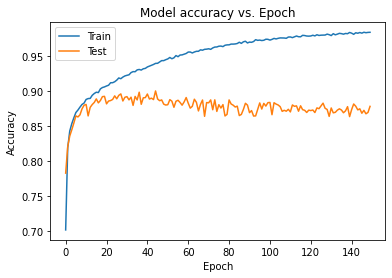

In [13]:
#Plot accuracy vs epoch
plot_ac_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

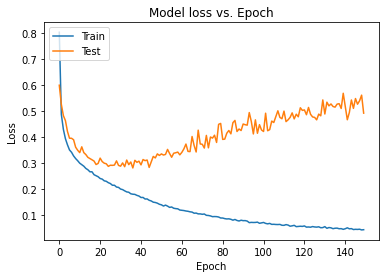

In [14]:
#Plot loss vs epoch
plot_loss_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: Gradually decrease and go to 0
  
2.   What does the loss of the testing set go to? 

  ANS: Decrease first and then slightly increase

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS: The dropout is only implemented on the input layer and it literally reduces the number of imput. However, the input varies in every epoch. The model could still overfit the training data from input although it didn't learn as much as bias and noise compared to the instance of part2.
  

#Part 4-I: Dropout on Hidden Layers

In [40]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()
    model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='softmax'))
    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#FILL THIS IN

#Train the model and assign training meta-data to a variable
CNN_mdata = CNN_dropout_hidden.fit(data_train, labels_train, epochs=150, batch_size=500, validation_data = (data_test, labels_test))
#FILL THIS IN

#Print accuracy of model on testing set after training 
test_loss, test_acc = CNN_dropout_hidden.evaluate(data_test, labels_test)
#FILL THIS IN

Epoch 1/150
120/120 [==============================] - 9s 75ms/step - loss: 0.7172 - accuracy: 0.7376 - val_loss: 0.5497 - val_accuracy: 0.8210
Epoch 2/150
120/120 [==============================] - 9s 74ms/step - loss: 0.4125 - accuracy: 0.8512 - val_loss: 0.4529 - val_accuracy: 0.8690
Epoch 3/150
120/120 [==============================] - 9s 74ms/step - loss: 0.3488 - accuracy: 0.8740 - val_loss: 0.4224 - val_accuracy: 0.8694
Epoch 4/150
120/120 [==============================] - 9s 74ms/step - loss: 0.3163 - accuracy: 0.8843 - val_loss: 0.3916 - val_accuracy: 0.8775
Epoch 5/150
120/120 [==============================] - 9s 74ms/step - loss: 0.2944 - accuracy: 0.8915 - val_loss: 0.3651 - val_accuracy: 0.8873
Epoch 6/150
120/120 [==============================] - 9s 74ms/step - loss: 0.2791 - accuracy: 0.8967 - val_loss: 0.3456 - val_accuracy: 0.8891
Epoch 7/150
120/120 [==============================] - 9s 74ms/step - loss: 0.2620 - accuracy: 0.9037 - val_loss: 0.3238 - val_accuracy:

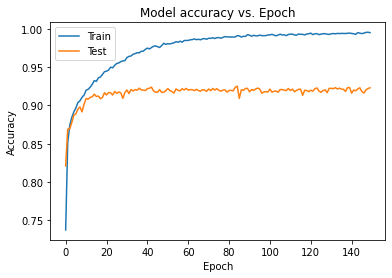

In [41]:
#Plot accuracy vs epoch
plot_ac_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

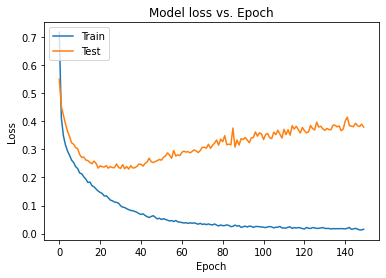

In [42]:
#Plot loss vs epoch
plot_loss_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: Decrease and go to 0
  
2.   What does the loss of the testing set go to? 

  ANS: Rapidly decrease at the first few epochs but gradually increase later

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: It randomly drops some neurons at the hidden network to reduce the model complexity.
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: The accuracy of the model on the training set is good and almost approaches 1. The accuracy of the model on the testing set is around 0.92. I think the model is a relatively good fit for the testing data compared to parts 2 and 3.

#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [43]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    model.add(Dropout(0.3))
    model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='softmax'))

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    return model


#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#FILL THIS IN

#Train the model and assign training meta-data to a variable
CNN_mdata = CNN_dropout_both.fit(data_train, labels_train, epochs=150, batch_size=500, validation_data = (data_test, labels_test))
#FILL THIS IN

#Print accuracy of model on testing set after training 
test_loss, test_acc = CNN_dropout_both.evaluate(data_test, labels_test)
#FILL THIS IN

Epoch 1/150
120/120 [==============================] - 10s 78ms/step - loss: 0.7657 - accuracy: 0.7135 - val_loss: 0.7522 - val_accuracy: 0.7982
Epoch 2/150
120/120 [==============================] - 9s 75ms/step - loss: 0.4823 - accuracy: 0.8190 - val_loss: 0.6565 - val_accuracy: 0.8305
Epoch 3/150
120/120 [==============================] - 9s 75ms/step - loss: 0.4262 - accuracy: 0.8423 - val_loss: 0.6048 - val_accuracy: 0.8512
Epoch 4/150
120/120 [==============================] - 9s 75ms/step - loss: 0.3940 - accuracy: 0.8536 - val_loss: 0.5568 - val_accuracy: 0.8560
Epoch 5/150
120/120 [==============================] - 9s 75ms/step - loss: 0.3795 - accuracy: 0.8586 - val_loss: 0.5705 - val_accuracy: 0.8594
Epoch 6/150
120/120 [==============================] - 9s 75ms/step - loss: 0.3595 - accuracy: 0.8666 - val_loss: 0.4941 - val_accuracy: 0.8617
Epoch 7/150
120/120 [==============================] - 9s 75ms/step - loss: 0.3496 - accuracy: 0.8683 - val_loss: 0.4867 - val_accuracy

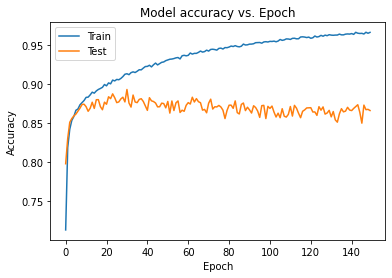

In [44]:
#Plot accuracy vs epoch
plot_ac_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

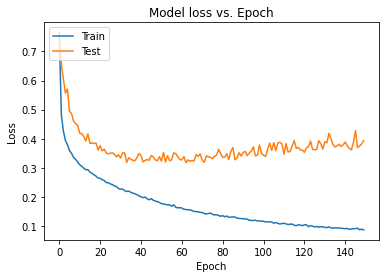

In [45]:
#Plot loss vs epoch
plot_loss_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: Become smaller and smaller and try to get closer to 0
  
2.   What does the loss of the testing set go to? 

  ANS: Decrease fast at first. But after several epochs, it also has a trend to grow larger.
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: The testing accuracy is around 0.86 and the training accuracy is around 0.96. It is not too far away from the level of training accuracy.

4.   Compare results in 4 with results in 5. Comment on robustness and accuracy.

  ANS: It didn't get the better accuracy on either training data or testing data compared with results in 4. It didn't significantly increase the robustness of the model.

#Part 5 : Activation Functions

In [46]:
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='sigmoid'))

    #FILL THIS IN WITH MODEL ARCHITECTURE   # use 'sigmoid' for point 1 and use 'tanh' for point 2
    
    return model


#Create instance of CNN model graph
CNN_dropout_both_act = CNN_dropout_both_act()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#FILL THIS IN

#Train the model and assign training meta-data to a variable
CNN_mdata = CNN_dropout_both_act.fit(data_train, labels_train, epochs=150, batch_size=500, validation_data = (data_test, labels_test))
#FILL THIS IN

#Print accuracy of model on testing set after training 
test_loss, test_acc = CNN_dropout_both_act.evaluate(data_test, labels_test)
#FILL THIS IN

Epoch 1/150
120/120 [==============================] - 9s 75ms/step - loss: 0.7233 - accuracy: 0.7339 - val_loss: 0.5863 - val_accuracy: 0.8130
Epoch 2/150
120/120 [==============================] - 9s 74ms/step - loss: 0.4035 - accuracy: 0.8536 - val_loss: 0.4819 - val_accuracy: 0.8570
Epoch 3/150
120/120 [==============================] - 9s 73ms/step - loss: 0.3504 - accuracy: 0.8721 - val_loss: 0.4255 - val_accuracy: 0.8686
Epoch 4/150
120/120 [==============================] - 9s 74ms/step - loss: 0.3129 - accuracy: 0.8856 - val_loss: 0.3779 - val_accuracy: 0.8795
Epoch 5/150
120/120 [==============================] - 9s 74ms/step - loss: 0.2968 - accuracy: 0.8915 - val_loss: 0.3708 - val_accuracy: 0.8895
Epoch 6/150
120/120 [==============================] - 9s 74ms/step - loss: 0.2802 - accuracy: 0.8963 - val_loss: 0.3345 - val_accuracy: 0.8935
Epoch 7/150
120/120 [==============================] - 9s 74ms/step - loss: 0.2591 - accuracy: 0.9043 - val_loss: 0.3304 - val_accuracy:

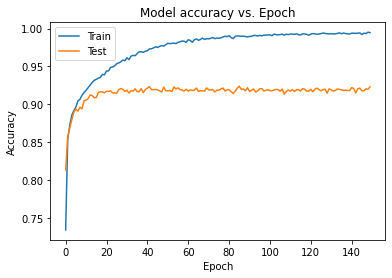

In [47]:
#Plot accuracy vs epoch
plot_ac_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

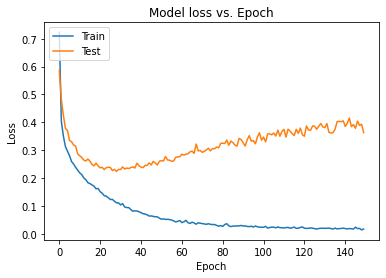

In [48]:
#Plot loss vs epoch
plot_loss_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

In [49]:
#Create and train model architecture
def CNN_dropout_both_act_tanh():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='tanh'))

    #FILL THIS IN WITH MODEL ARCHITECTURE   # use 'sigmoid' for point 1 and use 'tanh' for point 2
    
    return model

#Create instance of CNN model graph
CNN_dropout_both_act_tanh = CNN_dropout_both_act_tanh()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act_tanh.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#FILL THIS IN

#Train the model and assign training meta-data to a variable
CNN_mdata = CNN_dropout_both_act_tanh.fit(data_train, labels_train, epochs=150, batch_size=500, validation_data = (data_test, labels_test))
#FILL THIS IN

#Print accuracy of model on testing set after training 
test_loss, test_acc = CNN_dropout_both_act_tanh.evaluate(data_test, labels_test)
#FILL THIS IN


Epoch 1/150
120/120 [==============================] - 9s 74ms/step - loss: 8.6438 - accuracy: 0.1229 - val_loss: 8.0591 - val_accuracy: 0.1171
Epoch 2/150
120/120 [==============================] - 9s 73ms/step - loss: 8.0590 - accuracy: 0.0756 - val_loss: 8.0591 - val_accuracy: 0.1000
Epoch 3/150
120/120 [==============================] - 9s 73ms/step - loss: 8.0590 - accuracy: 0.0752 - val_loss: 8.0591 - val_accuracy: 0.1000
Epoch 4/150
120/120 [==============================] - 9s 73ms/step - loss: 8.0590 - accuracy: 0.0749 - val_loss: 8.0591 - val_accuracy: 0.1000
Epoch 5/150
120/120 [==============================] - 9s 73ms/step - loss: 8.0590 - accuracy: 0.0754 - val_loss: 8.0591 - val_accuracy: 0.1000
Epoch 6/150
120/120 [==============================] - 9s 73ms/step - loss: 8.0590 - accuracy: 0.0751 - val_loss: 8.0591 - val_accuracy: 0.1000
Epoch 7/150
120/120 [==============================] - 9s 73ms/step - loss: 8.0590 - accuracy: 0.0752 - val_loss: 8.0591 - val_accuracy:

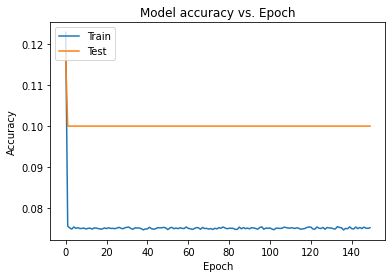

In [50]:
#Plot accuracy vs epoch
plot_ac_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

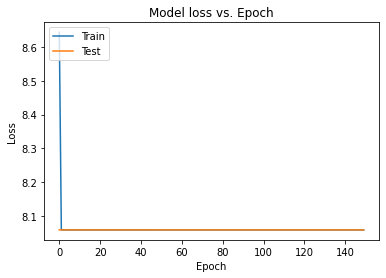

In [51]:
#Plot loss vs epoch
plot_loss_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

In [52]:
#Create and train model architecture
def CNN_dropout_both_act_tanh_2():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(100, activation='relu', kernel_initializer='normal'))
    model.add(Dense(10, activation='tanh'))

    #FILL THIS IN WITH MODEL ARCHITECTURE   # use 'sigmoid' for point 1 and use 'tanh' for point 2
    
    return model

#Create instance of CNN model graph
CNN_dropout_both_act_tanh_2 = CNN_dropout_both_act_tanh_2()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act_tanh_2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#FILL THIS IN

#Train the model and assign training meta-data to a variable
CNN_mdata = CNN_dropout_both_act_tanh_2.fit(data_train, labels_train, epochs=150, batch_size=500, validation_data = (data_test, labels_test))
#FILL THIS IN

#Print accuracy of model on testing set after training 
test_loss, test_acc = CNN_dropout_both_act_tanh_2.evaluate(data_test, labels_test)
#FILL THIS IN

Epoch 1/150
120/120 [==============================] - 9s 75ms/step - loss: 0.0382 - accuracy: 0.7569 - val_loss: 0.0311 - val_accuracy: 0.8489
Epoch 2/150
120/120 [==============================] - 9s 73ms/step - loss: 0.0217 - accuracy: 0.8695 - val_loss: 0.0248 - val_accuracy: 0.8733
Epoch 3/150
120/120 [==============================] - 9s 74ms/step - loss: 0.0181 - accuracy: 0.8876 - val_loss: 0.0212 - val_accuracy: 0.8831
Epoch 4/150
120/120 [==============================] - 9s 74ms/step - loss: 0.0162 - accuracy: 0.8982 - val_loss: 0.0193 - val_accuracy: 0.8898
Epoch 5/150
120/120 [==============================] - 9s 74ms/step - loss: 0.0148 - accuracy: 0.9060 - val_loss: 0.0190 - val_accuracy: 0.8905
Epoch 6/150
120/120 [==============================] - 9s 74ms/step - loss: 0.0139 - accuracy: 0.9114 - val_loss: 0.0176 - val_accuracy: 0.8961
Epoch 7/150
120/120 [==============================] - 9s 74ms/step - loss: 0.0133 - accuracy: 0.9145 - val_loss: 0.0168 - val_accuracy:

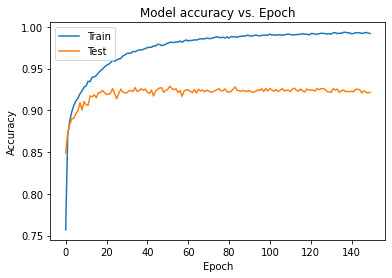

In [53]:
#Plot accuracy vs epoch
plot_ac_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

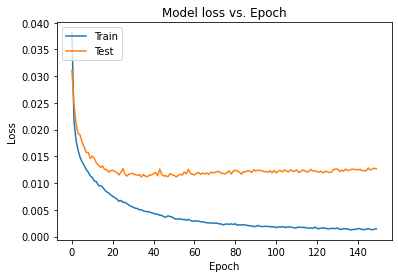

In [54]:
#Plot loss vs epoch
plot_loss_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS: There are not too many difference between them. The only difference between sigmoid and softmax is that the sum of the class-wise predicted probability is always 1 for the softmax network, while may not necessarily to be 1 for the sigmoid network. Sigmoid treats rows in the weight matrix of the last dense layer independently, while softmax treats them dependently. Therefore, sigmoid may better handle those samples with contradicting gradient directions.
  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS: No, so we tried MSE loss.

2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: Tanh transforms the values in the range -1 to 1 rather than 0 to 1. Cross entropy can't handle because log(a) isn't defined for a<=0.

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: It doesn't matter for the sigmoid which does produce outputs in the range 0 to +1.


# Part 5 Bonus a: Change hidden units

In [55]:
#Create and train model architecture
def CNN_dropout_both_hidden_sig():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='sigmoid'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, (3, 3), activation='sigmoid'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation='sigmoid', kernel_initializer='normal'))
    model.add(Dense(100, activation='sigmoid', kernel_initializer='normal'))
    model.add(Dense(10, activation='softmax'))

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    return model


#Create instance of CNN model graph
CNN_dropout_both_hidden_sig = CNN_dropout_both_hidden_sig()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_hidden_sig.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#FILL THIS IN

#Train the model and assign training meta-data to a variable
CNN_mdata = CNN_dropout_both_hidden_sig.fit(data_train, labels_train, epochs=150, batch_size=500, validation_data = (data_test, labels_test))
#FILL THIS IN

#Print accuracy of model on testing set after training 
test_loss, test_acc = CNN_dropout_both_hidden_sig.evaluate(data_test, labels_test)
#FILL THIS IN

Epoch 1/150
120/120 [==============================] - 10s 75ms/step - loss: 2.3117 - accuracy: 0.0994 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 2/150
120/120 [==============================] - 9s 74ms/step - loss: 2.3050 - accuracy: 0.0989 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 3/150
120/120 [==============================] - 9s 74ms/step - loss: 2.3050 - accuracy: 0.1016 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 4/150
120/120 [==============================] - 9s 74ms/step - loss: 2.3056 - accuracy: 0.0994 - val_loss: 2.3051 - val_accuracy: 0.1000
Epoch 5/150
120/120 [==============================] - 9s 74ms/step - loss: 2.3053 - accuracy: 0.1005 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 6/150
120/120 [==============================] - 9s 74ms/step - loss: 2.3060 - accuracy: 0.1006 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 7/150
120/120 [==============================] - 9s 74ms/step - loss: 2.3053 - accuracy: 0.0992 - val_loss: 2.3050 - val_accuracy

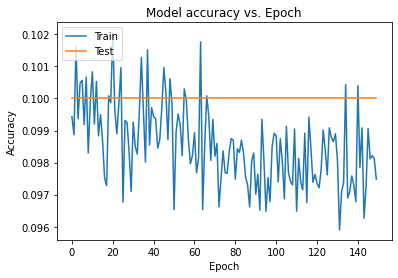

In [56]:
#Plot accuracy vs epoch
plot_ac_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

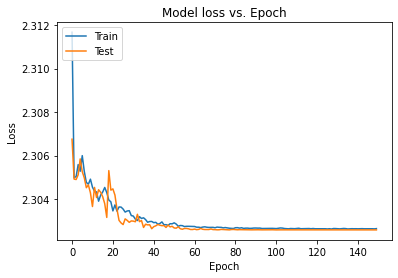

In [57]:
#Plot loss vs epoch
plot_loss_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

In [58]:
#Create and train model architecture
def CNN_dropout_both_hidden_tanh():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='tanh'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Conv2D(128, (3, 3), activation='tanh'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(100, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(100, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(10, activation='softmax'))

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    return model


#Create instance of CNN model graph
CNN_dropout_both_hidden_tanh = CNN_dropout_both_hidden_tanh()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_hidden_tanh.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#FILL THIS IN

#Train the model and assign training meta-data to a variable
CNN_mdata = CNN_dropout_both_hidden_tanh.fit(data_train, labels_train, epochs=150, batch_size=500, validation_data = (data_test, labels_test))
#FILL THIS IN

#Print accuracy of model on testing set after training 
test_loss, test_acc = CNN_dropout_both_hidden_tanh.evaluate(data_test, labels_test)
#FILL THIS IN

Epoch 1/150
120/120 [==============================] - 9s 75ms/step - loss: 0.6257 - accuracy: 0.7714 - val_loss: 0.5486 - val_accuracy: 0.7949
Epoch 2/150
120/120 [==============================] - 9s 74ms/step - loss: 0.3767 - accuracy: 0.8631 - val_loss: 0.5002 - val_accuracy: 0.8137
Epoch 3/150
120/120 [==============================] - 9s 74ms/step - loss: 0.3187 - accuracy: 0.8838 - val_loss: 0.4533 - val_accuracy: 0.8308
Epoch 4/150
120/120 [==============================] - 9s 74ms/step - loss: 0.2886 - accuracy: 0.8952 - val_loss: 0.3782 - val_accuracy: 0.8657
Epoch 5/150
120/120 [==============================] - 9s 74ms/step - loss: 0.2690 - accuracy: 0.9014 - val_loss: 0.4189 - val_accuracy: 0.8421
Epoch 6/150
120/120 [==============================] - 9s 74ms/step - loss: 0.2501 - accuracy: 0.9087 - val_loss: 0.3739 - val_accuracy: 0.8646
Epoch 7/150
120/120 [==============================] - 9s 74ms/step - loss: 0.2419 - accuracy: 0.9109 - val_loss: 0.3384 - val_accuracy:

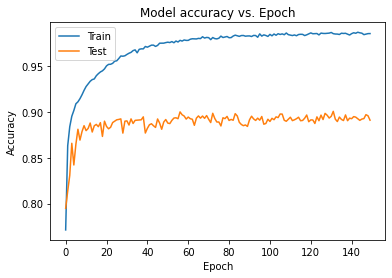

In [59]:
#Plot accuracy vs epoch
plot_ac_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

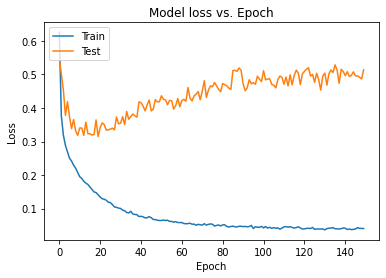

In [60]:
#Plot loss vs epoch
plot_loss_ep(CNN_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

# Part 5 Bonus b: Compare average activity

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [35]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!wget --no-check-certificate https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210919171536_2cef28f7fa1022915ff5d8f0_9570607d976720bd840de5619da548298b841443_002_20210919181536_0027_dnld
!mv RML2016.10b.tar.bz2?Authorization=3_20210919171536_2cef28f7fa1022915ff5d8f0_9570607d976720bd840de5619da548298b841443_002_20210919181536_0027_dnld RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#!wget --no-check-certificate https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210905042600_9ebb0f696c377bc7290bb975_66c18e4d224eae34b3bb075583a416cf32c3c181_002_20210905052600_0027_dnld
#!tar -xvjf RML2016.10b.tar.bz2
Xd = cPickle.load(open("RML2016.10b.dat",'rb'), encoding='latin1')
#Extract high SNR data and obtain their corresponding lables 
#Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy = list(yy)
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2021-09-19 17:16:19--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2 [following]
--2021-09-19 17:16:19--  https://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 986 [text/html]
Saving to: ‘RML2016.10b.tar.bz2.1’

RML2016.10b.tar.bz2 100%[===================>]     986  --.-KB/s    in 0s      

2021-09-19 17:16:19 (133 MB/s) - ‘RML2016.10b.tar.bz2.1’ saved [986/986]

--2021-09-19 17:16:20--  https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210919171536_2cef28f7fa1022915ff5d8f0_9570607

In [37]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    model.add(Conv2D(256, (1, 3), activation='relu', input_shape=(2, 128, 1)))
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (2, 3), activation='relu'))
    model.add(Conv2D(80, (1, 3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(80, (1, 3), activation='relu'))
    model.add(Reshape((-1, 80)))
    model.add(LSTM(50))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    return model

#Create instance of CNN model graph
#CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
cldnn = cldnn()
cldnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#FILL THIS IN

#Train the model and assign training meta-data to a variable
cldnn_mdata = cldnn.fit(X_train, Y_train, epochs=100, batch_size=4000, validation_data = (X_test, Y_test))
#FILL THIS IN

#Print accuracy of model on testing set after training 
test_loss, test_acc = cldnn.evaluate(X_test, Y_test)
#FILL THIS IN

Epoch 1/100
108/108 [==============================] - 84s 712ms/step - loss: 2.0464 - accuracy: 0.1851 - val_loss: 2.4412 - val_accuracy: 0.1410
Epoch 2/100
108/108 [==============================] - 79s 729ms/step - loss: 1.7812 - accuracy: 0.2681 - val_loss: 1.6328 - val_accuracy: 0.3109
Epoch 3/100
108/108 [==============================] - 79s 735ms/step - loss: 1.6501 - accuracy: 0.3077 - val_loss: 1.6947 - val_accuracy: 0.2998
Epoch 4/100
108/108 [==============================] - 79s 736ms/step - loss: 1.4980 - accuracy: 0.3630 - val_loss: 1.3430 - val_accuracy: 0.4262
Epoch 5/100
108/108 [==============================] - 79s 734ms/step - loss: 1.3245 - accuracy: 0.4259 - val_loss: 1.1642 - val_accuracy: 0.4794
Epoch 6/100
108/108 [==============================] - 79s 734ms/step - loss: 1.1397 - accuracy: 0.4890 - val_loss: 0.9996 - val_accuracy: 0.5122
Epoch 7/100
108/108 [==============================] - 79s 734ms/step - loss: 1.0180 - accuracy: 0.5169 - val_loss: 1.0197 -

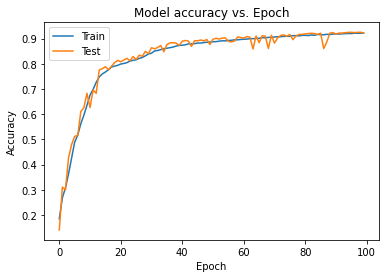

In [38]:
#Plot accuracy vs epoch
plot_ac_ep(cldnn_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

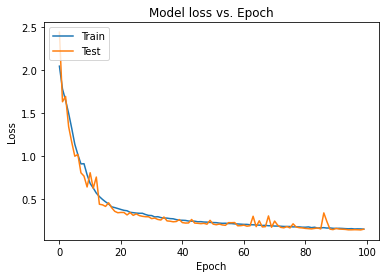

In [39]:
#Plot loss vs epoch
plot_loss_ep(cldnn_mdata)
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: Yes, I think the model fit well for both training and testing data.

2.   Give two ways to improve the robustness of the model.

  ANS: We can add dropout to the hidden layers and use the regularization term to prevent overfitting. Besides, the training dataset plays an important role. It should be large and balanced enough to have a good distribution to cover the potential testing dataset feature spaces.